# EDA - Exploratory Data Analysis 
## Univariate

In [1]:
# %pip install seaborn pandas matplotlib

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Categorical Data


### a. Countplot


Sex
male      577
female    314
Name: count, dtype: int64

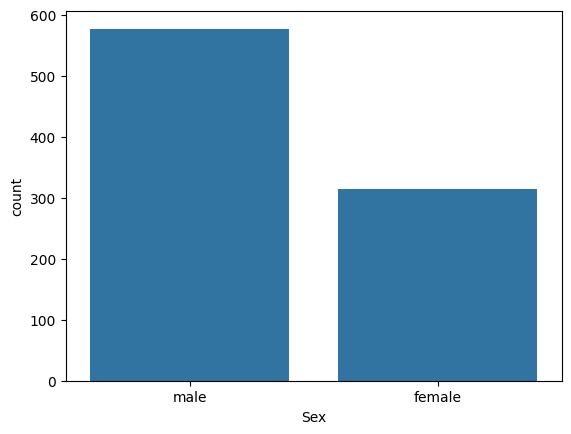

In [5]:
sns.countplot(x='Sex', data=df)
df['Sex'].value_counts()

### b. PieChart


<Axes: ylabel='count'>

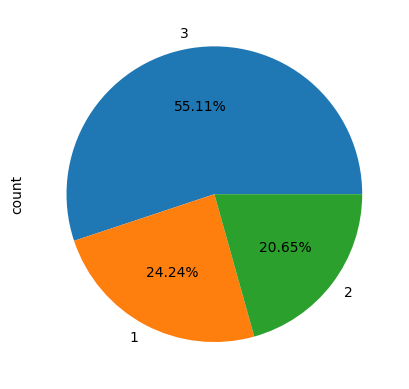

In [6]:
df['Pclass'].value_counts().plot.pie(autopct='%1.2f%%')

### _________________________________________________________________________________________

# 2. Numerical Data


### a. Histogram

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

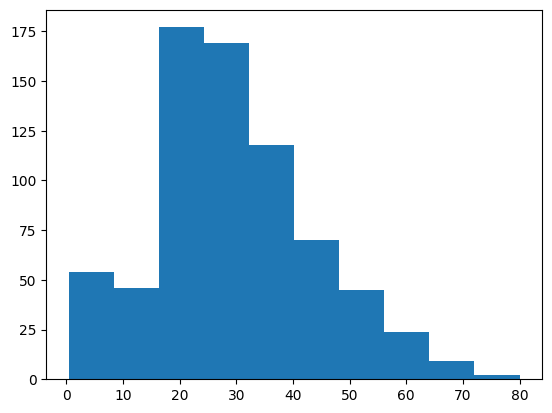

In [7]:
plt.hist(df['Age'].dropna(), bins=10)
# dropna() drops null values for accurate plotting

### b. Hisplot

<Axes: xlabel='Age', ylabel='Density'>

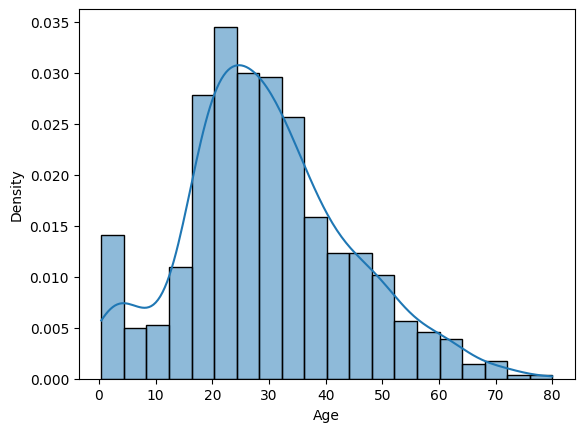

In [8]:
sns.histplot(df['Age'], kde=True, stat='density')

### c. Boxplot


<Axes: xlabel='Fare'>

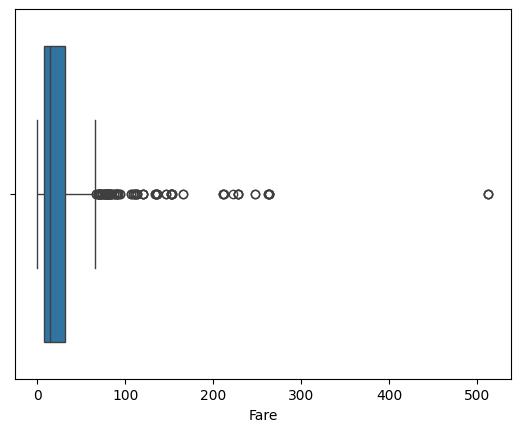

In [9]:
# useful when working with noisy data
sns.boxplot(x=df['Fare'])

In [10]:
df['Age'].min()

np.float64(0.42)

In [11]:
df['Age'].max()

np.float64(80.0)

In [12]:
df['Age'].mean()

np.float64(29.69911764705882)

In [13]:
df['Age'].skew()

np.float64(0.38910778230082704)

## Bivariate Analysis


In [14]:
import pandas as pd
import seaborn as sns

In [15]:
tips = sns.load_dataset('tips')   # restraunt data with tips info

In [16]:
titanic = pd.read_csv('train.csv') # Titanic dataset

In [17]:
flights = sns.load_dataset('flights') # airline passenger data

In [18]:
iris = sns.load_dataset('iris') # flower species data

### 1. Scatterplot (Numerical - Numerical)

<Axes: xlabel='total_bill', ylabel='tip'>

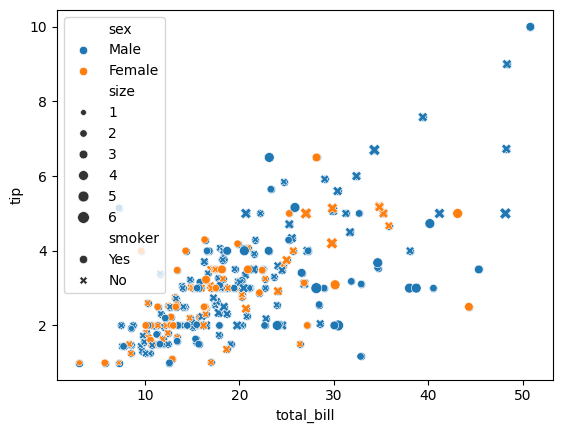

In [19]:
# We will use tips dataset

# Bi-variate Analysis
sns.scatterplot(x='total_bill', y='tip', data=tips)

# Multivariate Analysis
sns.scatterplot(x='total_bill', y='tip', data=tips, hue = 'sex', style = 'smoker', size = 'size')


### 2. BarPlot (Numerical - Categorical)

In [20]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='Fare'>

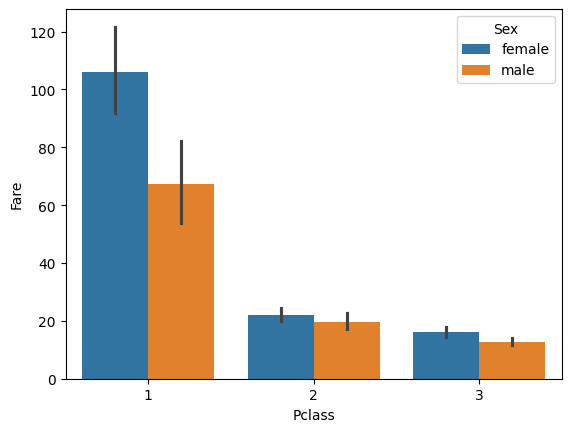

In [21]:
# we will use the titanic dataset
# sns.barplot(x='Pclass', y='Fare', data=titanic)

# Multivariate Analysis
sns.barplot(x='Pclass', y='Fare', data=titanic, hue='Sex')

### 3. Boxplot (Numerical - Categorical)

<Axes: xlabel='Sex', ylabel='Age'>

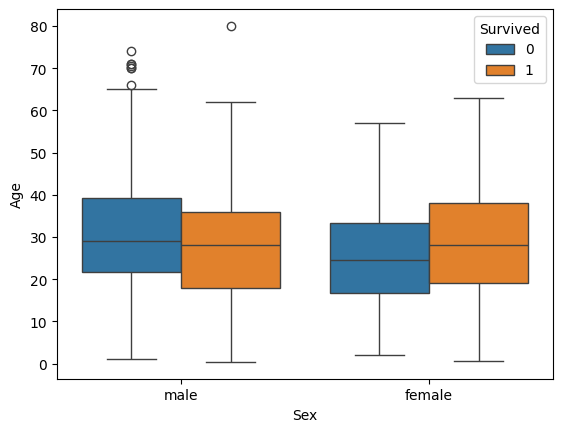

In [22]:
sns.boxplot(x='Sex', y='Age', data=titanic, hue = 'Survived')

### 4. Displot (Numerical - Categorical)

<Axes: xlabel='Age', ylabel='Density'>

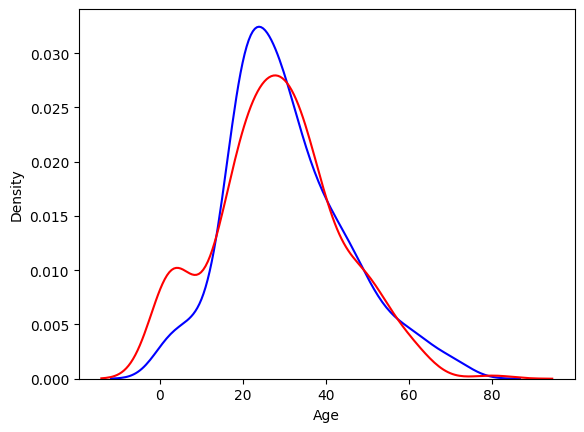

In [23]:
sns.kdeplot(titanic[titanic['Survived'] == 0]['Age'],color = 'blue', label='Not Survived')
sns.kdeplot(titanic[titanic['Survived'] == 1]['Age'],color = 'red', label='Survived')

### 5. Heatmap (Categorical -Categorical)

In [24]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<Axes: xlabel='Survived', ylabel='Pclass'>

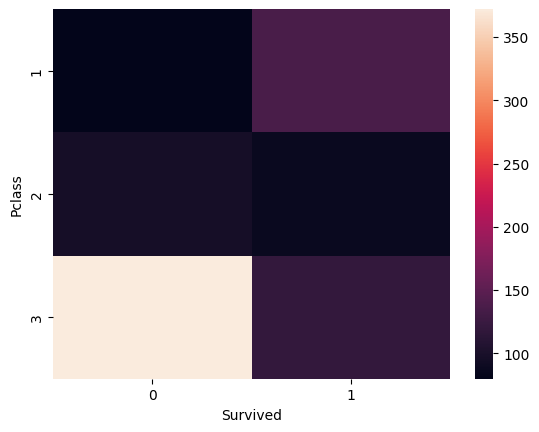

In [25]:
sns.heatmap(pd.crosstab(titanic['Pclass'], titanic['Survived']))

In [26]:
# getting the percentage of people survived in each class
(titanic.groupby('Sex')['Survived'].mean() * 100)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

### 6. Clustermap ( Categorical -Categorical)

In [27]:
# %pip install scipy

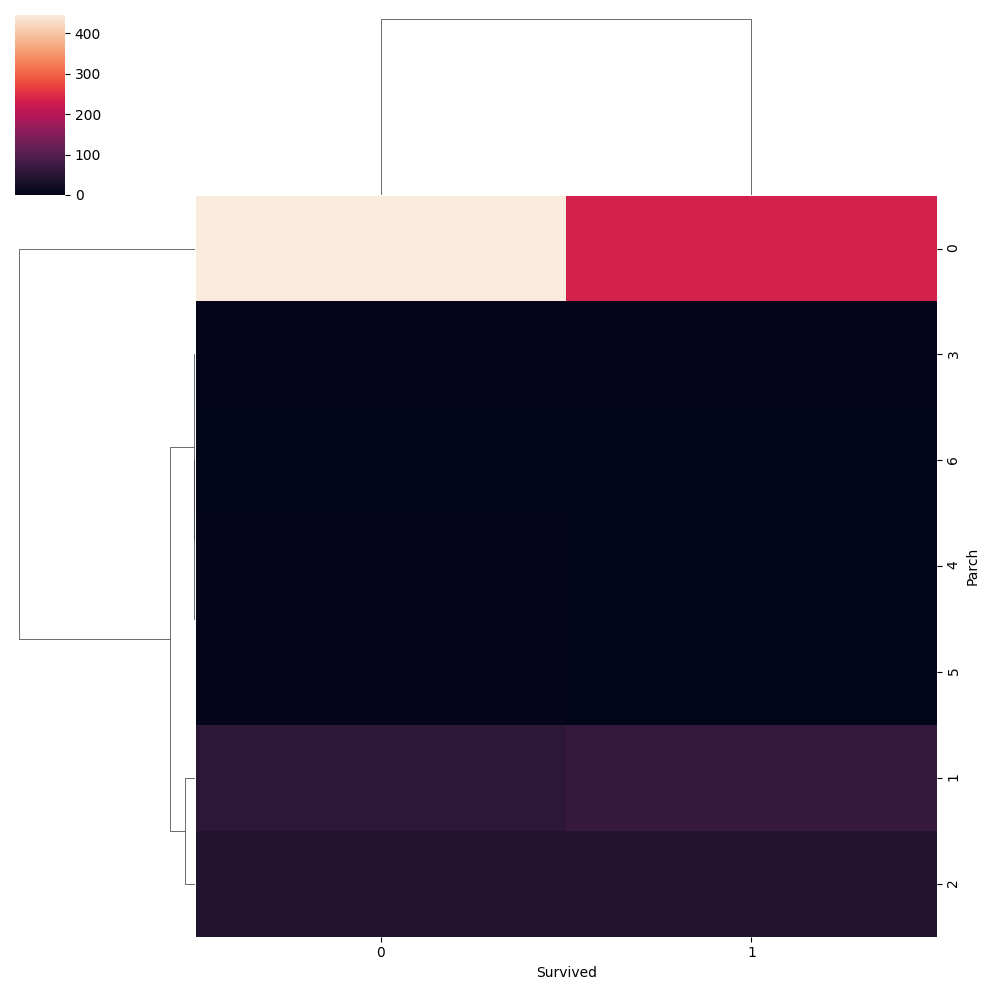

In [28]:
sns.clustermap(pd.crosstab(titanic['Parch'], titanic['Survived']))

### 7. Pairplot

In [29]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


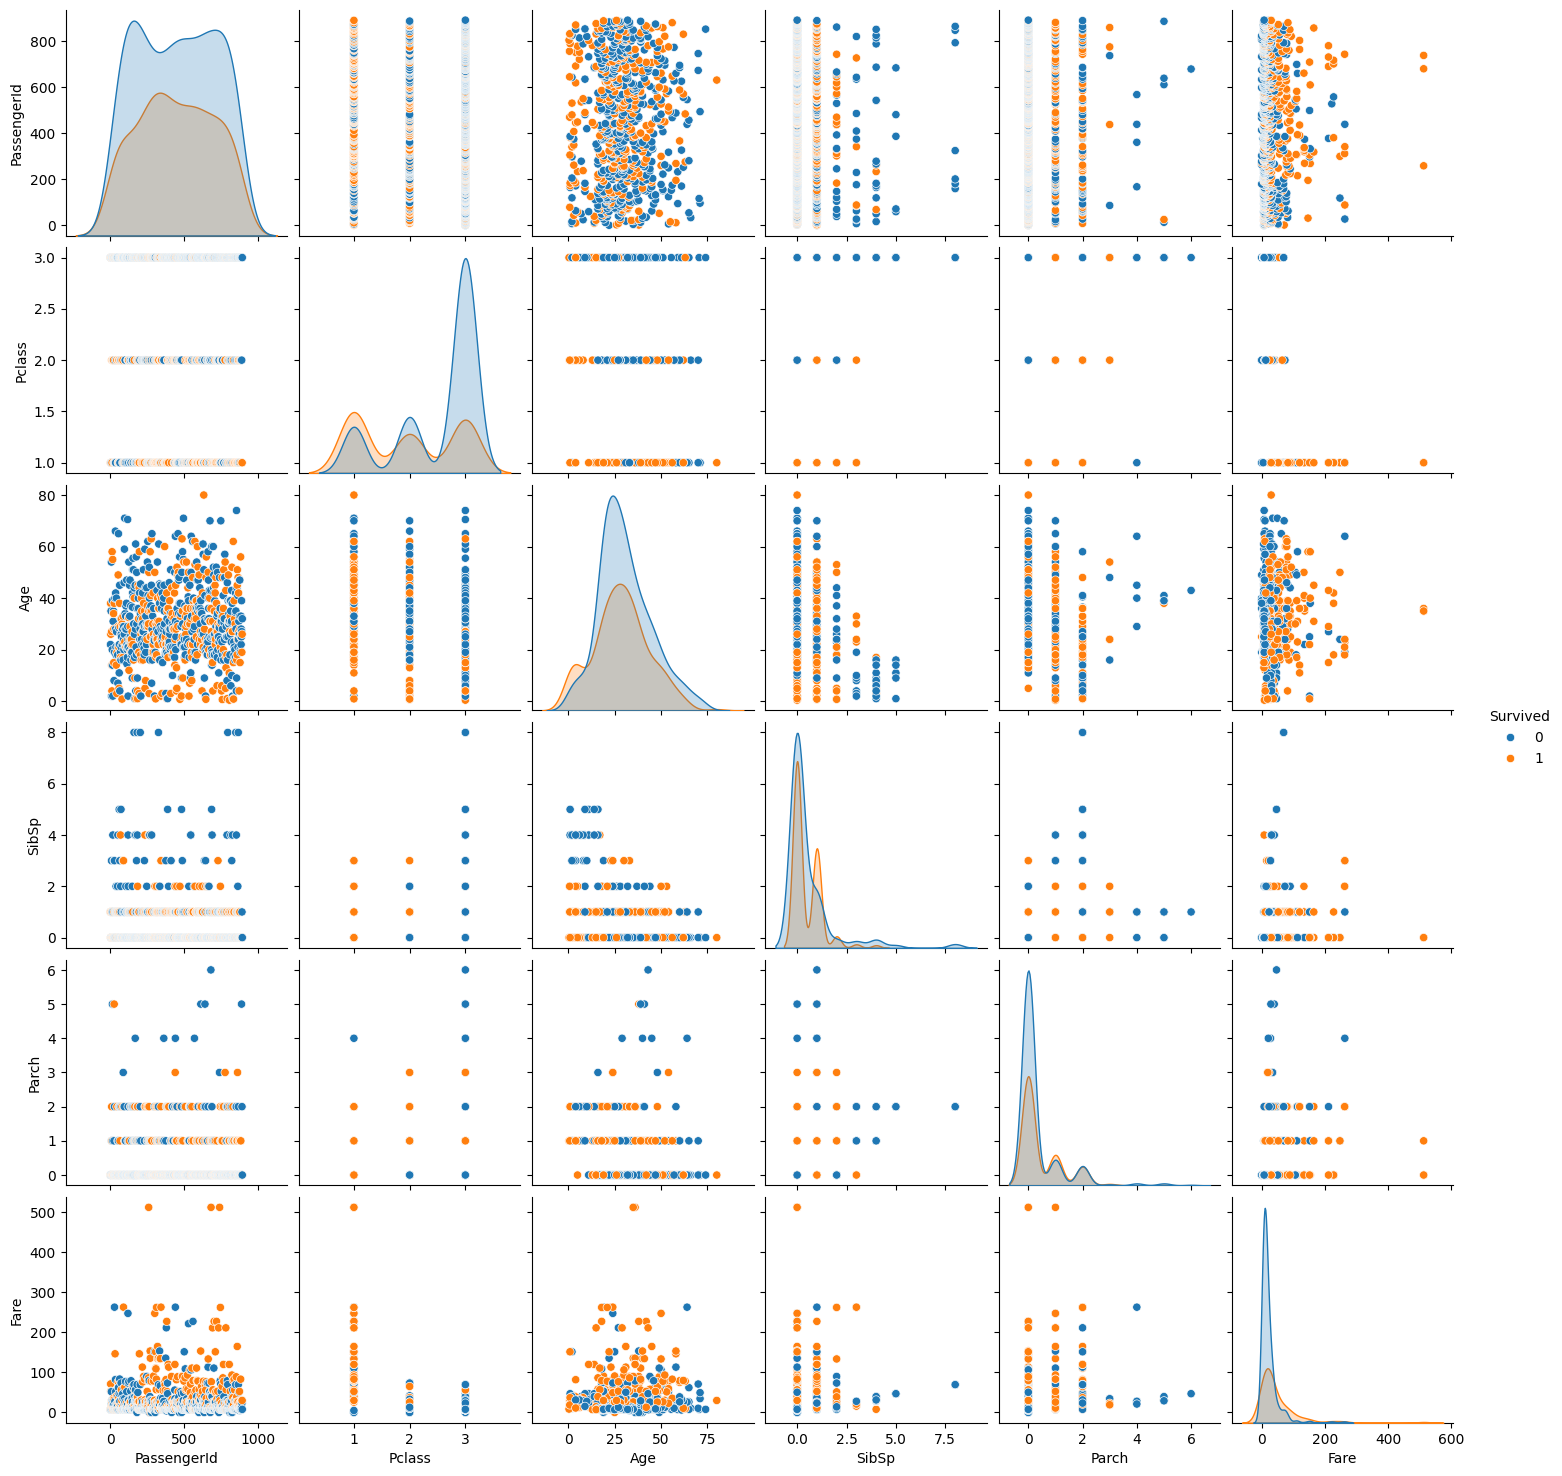

In [30]:
sns.pairplot(titanic, hue='Survived')

### 8. Lineplot (Numerical - Nummerical)

In [32]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [41]:
new = flights.groupby('year')['passengers'].sum().reset_index()

<Axes: xlabel='year', ylabel='passengers'>

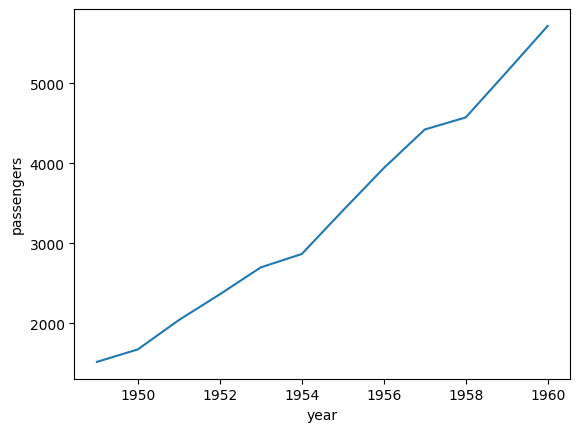

In [44]:
sns.lineplot(x='year', y='passengers', data=new)

C:\Users\Raunak\AppData\Local\Temp\ipykernel_20036\1314982076.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(flights.pivot_table(values='passengers', index='month', columns='year'))


<Axes: xlabel='year', ylabel='month'>

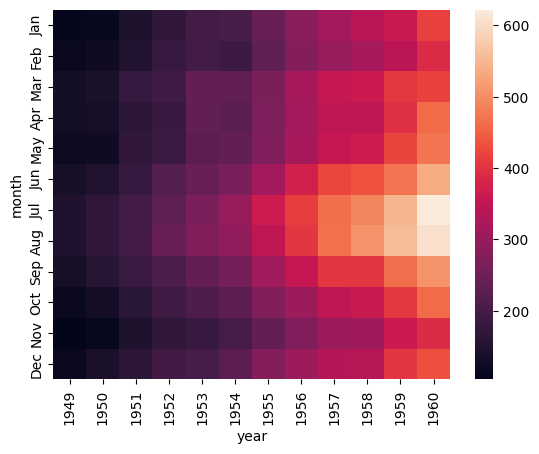

In [52]:
sns.heatmap(flights.pivot_table(values='passengers', index='month', columns='year'))

C:\Users\Raunak\AppData\Local\Temp\ipykernel_20036\4123406173.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.clustermap(flights.pivot_table(values='passengers', index='month', columns='year'))


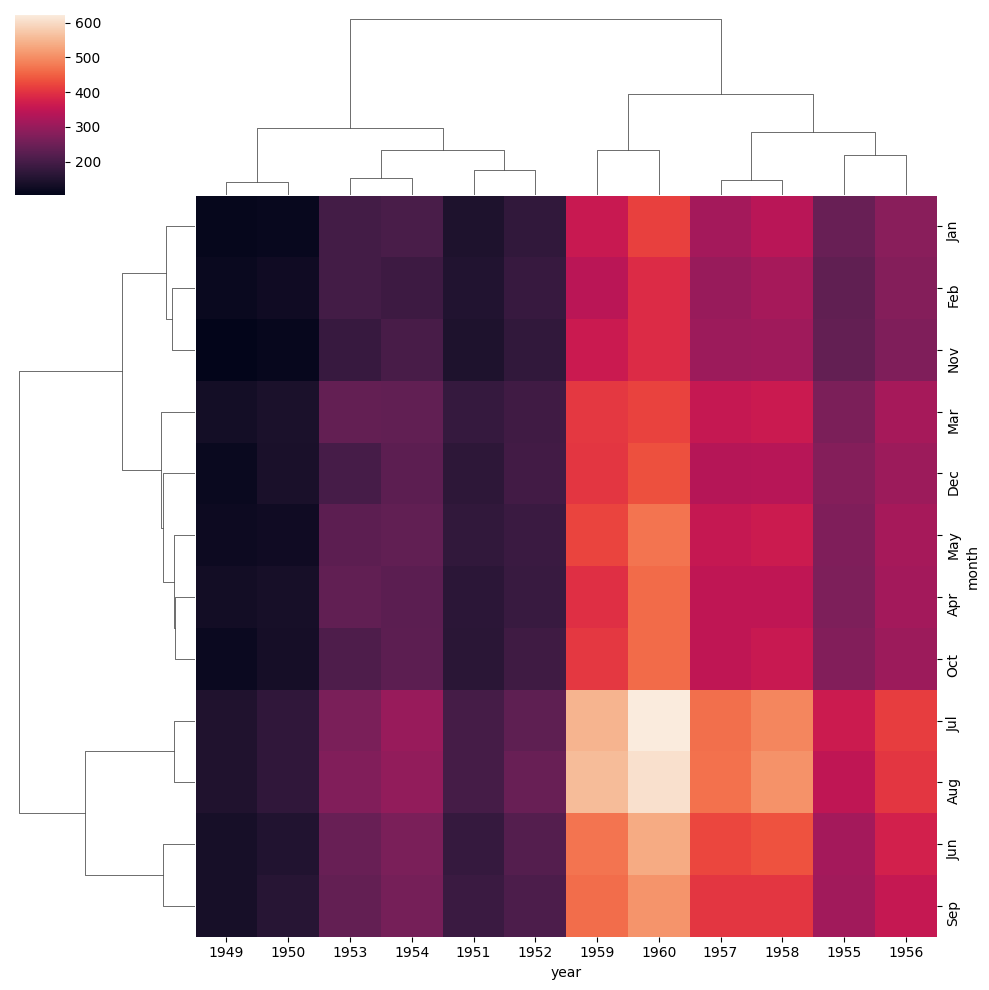

In [50]:

sns.clustermap(flights.pivot_table(values='passengers', index='month', columns='year'))